In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
#Reading the file
data = pd.read_csv('fifa21_trainning.csv')
data.shape

(13700, 102)

In [3]:
#Dropping columns thats out of scope in this analyzes.
#Standardizing colum names
#Removing dublicates
data.columns = [e.lower().replace(' ', '_') for e in data.columns]
data2 = data.drop(['unnamed:_0', 'id', 'loan_date_end', 'contract', 'joined'], axis = 1, inplace = True) #loan date missing 95% of the data
data2 = data.drop_duplicates()
data2.head()

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,€525K,€4K,€801K,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,€8.5M,€23K,€0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,€9M,€49K,€15.3M,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,€275K,€4K,€694K,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,€725K,€2K,€1.4M,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
#First numerical model excluding columns with Euro and +- in between 
x_num = data2.select_dtypes(include=np.number).replace(np.nan, 0).fillna(0)
x_cat = data2.select_dtypes(include=np.object).replace(np.nan, 'no_value')
x_num.describe().T
x_num['composure'].isna().sum()

0

In [5]:
c = pd.DataFrame(((x_num.corrwith(x_num['ova']))**2)**.5)
c = c.sort_values(0,ascending=False)
c = c[0:12].T

In [6]:
c = c.columns
l = []
for i in range(len(c)):
    l.append(c[i])
print(l)

['ova', 'reactions', 'base_stats', 'pas', 'dri', 'total_stats', 'growth', 'power', 'phy', 'shot_power', 'age', 'composure']


In [7]:
x_num_correlation = x_num[l]
x_num_correlation.head()

,ova,reactions,base_stats,pas,dri,total_stats,growth,power,phy,shot_power,age,composure
0,64,66,357,63,63,1682,1,306,60,62,26,54.0
1,77,75,412,68,82,1961,0,372,71,74,30,70.0
2,80,78,404,78,86,1925,0,308,56,79,33,82.0
3,59,55,329,54,57,1527,13,277,60,57,22,48.0
4,65,62,360,60,64,1664,8,280,66,61,23,58.0


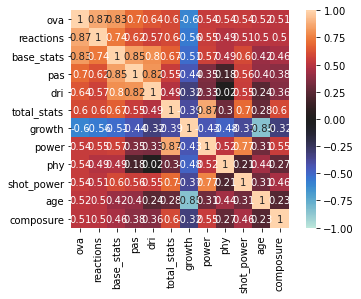

In [8]:
sns.heatmap(x_num_correlation.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True)
plt.show()

In [9]:
x_num_correlation2 = x_num_correlation.drop(['ova'], axis = 1)

In [10]:
x_normalized = Normalizer().fit_transform(x_num_correlation2)
x_standardized = StandardScaler().fit_transform(x_num_correlation2)
print(x_standardized.shape)

(13700, 11)


In [11]:
x = x_normalized
y = x_num_correlation['ova']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.6394773289966321

In [14]:
r2 = r2_score(y_test, predictions)
n = len(x_test) 
p = x_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.6385096009875944

In [15]:
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

4.10939387028941


In [16]:
#Second model including 3 columns with Euro
x_cat['wage_copy'] = x_cat['wage']
x_cat['wage']

0         €4K
1        €23K
2        €49K
3         €4K
4         €2K
         ... 
13695     €1K
13696    €700
13697     €9K
13698     €4K
13699     €1K
Name: wage, Length: 13700, dtype: object

In [17]:
x_cat['wage_normalized'] = list(map(lambda x: x.replace ("€", ""), x_cat['wage_copy']))
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) / 1000
        return 1000.0
    else:
        return float(x) / 1000
x_cat['wage_normalized'] = x_cat['wage_normalized'].apply(value_to_float)
x_cat['wage_normalized'].unique = x_cat['wage_normalized'].sort_values(0,ascending=False)
x_cat['wage_normalized']

0        0.004
1        0.023
2        0.049
3        0.004
4        0.002
         ...  
13695    0.001
13696    0.700
13697    0.009
13698    0.004
13699    0.001
Name: wage_normalized, Length: 13700, dtype: float64

In [18]:
x_cat['value_copy'] = x_cat['value']
x_cat['value_copy']

0        €525K
1        €8.5M
2          €9M
3        €275K
4        €725K
         ...  
13695    €325K
13696    €190K
13697      €8M
13698    €140K
13699    €425K
Name: value_copy, Length: 13700, dtype: object

In [19]:
x_cat['value_normalized'] = list(map(lambda x: x.replace ("€", ""), x_cat['value_copy']))
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) / 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', ''))
        return 1.0
    else:
        return float(x)
x_cat['value_normalized'] = x_cat['value_normalized'].apply(value_to_float)
x_cat['value_normalized'].unique = x_cat['value_normalized'].sort_values(0,ascending=False)
x_cat['value_normalized']

0        0.525
1        8.500
2        9.000
3        0.275
4        0.725
         ...  
13695    0.325
13696    0.190
13697    8.000
13698    0.140
13699    0.425
Name: value_normalized, Length: 13700, dtype: float64

In [20]:
x_cat['release_clause_copy'] = x_cat['release_clause']
x_cat['release_clause_copy']

0         €801K
1            €0
2        €15.3M
3         €694K
4         €1.4M
          ...  
13695     €731K
13696     €285K
13697      €12M
13698     €245K
13699     €946K
Name: release_clause_copy, Length: 13700, dtype: object

In [21]:
x_cat['release_clause_normalized'] = list(map(lambda x: x.replace ("€", ""), x_cat['release_clause_copy']))
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) / 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', ''))
        return 1.0
    else:
        return float(x)
x_cat['release_clause_normalized'] = x_cat['release_clause_normalized'].apply(value_to_float)
x_cat['release_clause_normalized'].unique = x_cat['release_clause_normalized'].sort_values(0,ascending=False)
x_cat['release_clause_normalized']

0         0.801
1         0.000
2        15.300
3         0.694
4         1.400
          ...  
13695     0.731
13696     0.285
13697    12.000
13698     0.245
13699     0.946
Name: release_clause_normalized, Length: 13700, dtype: float64

In [22]:
x2 = pd.concat([x_num_correlation2, x_cat['release_clause_normalized'], x_cat['value_normalized'], x_cat['wage_normalized']], axis = 1)
y2 = x_num_correlation['ova']
x2

,reactions,base_stats,pas,dri,total_stats,growth,power,phy,shot_power,age,composure,release_clause_normalized,value_normalized,wage_normalized
0,66,357,63,63,1682,1,306,60,62,26,54.0,0.801,0.525,0.004
1,75,412,68,82,1961,0,372,71,74,30,70.0,0.000,8.500,0.023
2,78,404,78,86,1925,0,308,56,79,33,82.0,15.300,9.000,0.049
3,55,329,54,57,1527,13,277,60,57,22,48.0,0.694,0.275,0.004
4,62,360,60,64,1664,8,280,66,61,23,58.0,1.400,0.725,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,50,315,46,55,1443,11,245,57,31,21,59.0,0.731,0.325,0.001
13696,59,318,57,62,928,9,177,54,43,21,33.0,0.285,0.190,0.700
13697,73,388,78,77,1867,0,329,60,63,27,75.0,12.000,8.000,0.009
13698,61,346,58,58,1639,0,300,69,53,34,60.0,0.245,0.140,0.004


In [23]:
x_num_correlation3 = pd.concat([x2, x_num_correlation['ova']])

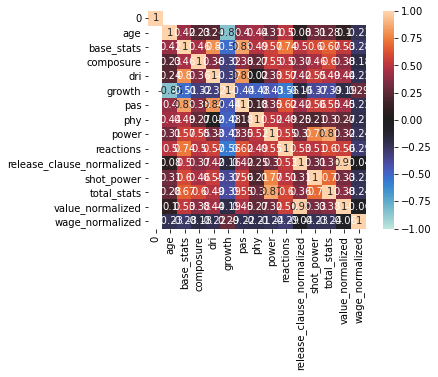

In [24]:
sns.heatmap(x_num_correlation3.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True)
plt.show()

In [25]:
x2_normalized = Normalizer().fit_transform(x2)
x2_standardized = StandardScaler().fit_transform(x2)
print(x_standardized.shape)

(13700, 11)


In [26]:
x = x2_normalized
y = x_num_correlation['ova']

In [27]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state=100)

In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(x2_train,y2_train)
predictions  = lm.predict(x2_test)
r2_score(y2_test, predictions)

0.8748051357814624

In [29]:
r2 = r2_score(y2_test, predictions)
n = len(x2_test) 
p = x2_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.8743771191516554

In [30]:
rmse = mean_squared_error(y2_test, predictions)**0.5
print(rmse)

2.4216129785714324


In [31]:
#3rd model including all numerical columns for correlation (columns with +/+- in between)
data3 = data2[data2.columns[-28:]].drop(['ova'], axis = 1)
data3

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,44+2,44+2,44+2,51+0,48+0,48+0,48+0,51+0,48+2,48+2,48+2,53+2,48+2,48+2,48+2,53+2,58+2,52+2,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2
13696,22+2,22+2,22+2,20+0,22+0,22+0,22+0,20+0,23+2,23+2,23+2,22+2,24+2,24+2,24+2,22+2,20+2,23+2,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2
13697,67+2,67+2,67+2,74+0,73+0,73+0,73+0,74+0,76+0,76+0,76+0,75+1,74+2,74+2,74+2,75+1,62+2,60+2,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2
13698,55+2,55+2,55+2,56+0,55+0,55+0,55+0,56+0,57+2,57+2,57+2,57+2,59+2,59+2,59+2,57+2,60+2,62+1,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2


In [32]:
data4 = data3
columns = data4.columns
colplus = []
for i in range(len(columns)):
    colplus.append(columns[i])
print(colplus)

['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


In [33]:
def my_adding_fct(arg):
    if '+-' in arg:
        my_splitted_lst = arg.split('+-')
    elif '+' in arg:
        my_splitted_lst = arg.split('+')
    else:
        print('no')
    my_splitted_lst = [int(i) for i in my_splitted_lst]
    return sum(my_splitted_lst)
for i in range(len(colplus)): 
    data4[colplus[i]] = data4[colplus[i]].apply(my_adding_fct)
data4.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20
2,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14
3,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16
4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17


In [34]:
x3 = pd.concat([x2, data4], axis = 1)
y3 = x_num_correlation['ova']
x3

,reactions,base_stats,pas,dri,total_stats,growth,power,phy,shot_power,age,composure,release_clause_normalized,value_normalized,wage_normalized,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,66,357,63,63,1682,1,306,60,62,26,54.0,0.801,0.525,0.004,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,75,412,68,82,1961,0,372,71,74,30,70.0,0.000,8.500,0.023,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20
2,78,404,78,86,1925,0,308,56,79,33,82.0,15.300,9.000,0.049,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14
3,55,329,54,57,1527,13,277,60,57,22,48.0,0.694,0.275,0.004,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16
4,62,360,60,64,1664,8,280,66,61,23,58.0,1.400,0.725,0.002,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,50,315,46,55,1443,11,245,57,31,21,59.0,0.731,0.325,0.001,46,46,46,51,48,48,48,51,50,50,50,55,50,50,50,55,60,54,54,54,60,60,56,56,56,60,17
13696,59,318,57,62,928,9,177,54,43,21,33.0,0.285,0.190,0.700,24,24,24,20,22,22,22,20,25,25,25,24,26,26,26,24,22,25,25,25,22,22,24,24,24,22,60
13697,73,388,78,77,1867,0,329,60,63,27,75.0,12.000,8.000,0.009,69,69,69,74,73,73,73,74,76,76,76,76,76,76,76,76,64,62,62,62,64,59,49,49,49,59,20
13698,61,346,58,58,1639,0,300,69,53,34,60.0,0.245,0.140,0.004,57,57,57,56,55,55,55,56,59,59,59,59,61,61,61,59,62,63,63,63,62,62,63,63,63,62,16


In [35]:
c = pd.DataFrame(((x3.corrwith(x_num_correlation['ova']))**2)**.5)
c = c.sort_values(0,ascending=False)
c = c[0:15].T
c

,reactions,base_stats,pas,dri,value_normalized,total_stats,release_clause_normalized,growth,power,phy,shot_power,rcm,lcm,cm,age
0,0.869824,0.832967,0.700421,0.643046,0.632681,0.604432,0.598741,0.596555,0.544295,0.543247,0.535906,0.524633,0.524633,0.524633,0.519422


In [36]:
c = c.columns
l = []
for i in range(len(c)):
    l.append(c[i])
print(l)

['reactions', 'base_stats', 'pas', 'dri', 'value_normalized', 'total_stats', 'release_clause_normalized', 'growth', 'power', 'phy', 'shot_power', 'rcm', 'lcm', 'cm', 'age']


In [37]:
x3_normalized = Normalizer().fit_transform(x3)
x3_standardized = StandardScaler().fit_transform(x3)
print(x_normalized.shape)

(13700, 11)


In [38]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3[l], y3, test_size = 0.3, random_state=100)

In [39]:
lm = linear_model.LinearRegression()
model = lm.fit(x3_train,y3_train)
predictions  = lm.predict(x3_test)
r2_score(y3_test, predictions)

0.8732912910862152

In [40]:
r2 = r2_score(y3_test, predictions)
n = len(x3_test) 
p = x3_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.872827043251895

In [41]:
rmse = mean_squared_error(y3_test, predictions)**0.5
print(rmse)

2.436209944725871


In [42]:
x3 = pd.concat([x2, data4], axis = 1)
y3 = x_num_correlation['ova']
c = pd.DataFrame(((x3.corrwith(x_num_correlation['ova']))**2)**.5)
c = c.sort_values(0,ascending=False)
c = c[0:].T
c = c.columns
l = []
for i in range(len(c)):
    l.append(c[i])
x3_normalized = Normalizer().fit_transform(x3[l])
x3_standardized = StandardScaler().fit_transform(x3[l])
x3_train, x3_test, y3_train, y3_test = train_test_split(x3[l], y3, test_size = 0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(x3_train,y3_train)
predictions  = lm.predict(x3_test)
round(r2_score(y3_test, predictions),3)

0.887

In [43]:
#Just model to run different variations
#Current based only on colums with +/+- inside: data4 df
x3 = data4
y3 = x_num_correlation['ova']
c = pd.DataFrame(((data4.corrwith(x_num_correlation['ova']))**2)**.5)
c = c.sort_values(0,ascending=False)
c = c[0:].T
c = c.columns
l = []
for i in range(len(c)):
    l.append(c[i])
x3_normalized = Normalizer().fit_transform(data4)
x3_standardized = StandardScaler().fit_transform(data4)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(x3_train,y3_train)
predictions  = lm.predict(x3_test)
r2_score(y3_test, predictions)

0.782386540205489